In [330]:
import pandas as pd

data = pd.read_csv('data_matrix.csv', sep=';')

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
print(data)

                     gracia    pr  eixample  prat  montcada  ciutadella  \
date                                                                      
2017-06-01 01:00:00    29.0  24.0      34.0  28.0      26.0        43.0   
2017-06-01 02:00:00    16.0  14.0      27.0  27.0      17.0         9.0   
2017-06-01 03:00:00    11.0  14.0       9.0  22.0      11.0         4.0   
2017-06-01 04:00:00    13.0  27.0      14.0  23.0      10.0         4.0   
2017-06-01 05:00:00    40.0  33.0      42.0  16.0       5.0         2.0   
...                     ...   ...       ...   ...       ...         ...   
2017-10-06 19:00:00    18.0  44.0      10.0  61.0      58.0        48.0   
2017-10-06 20:00:00    16.0  35.0       7.0  54.0      50.0        58.0   
2017-10-06 21:00:00    35.0  43.0      14.0  52.0      51.0        53.0   
2017-10-06 22:00:00    41.0  58.0      32.0  49.0      50.0        55.0   
2017-10-06 23:00:00    43.0  58.0      28.0  51.0      53.0        44.0   

                     heb

In [248]:
import pandas as pd

barrisLocations = pd.read_csv('Node-Location.csv', sep=';')

print(barrisLocations)

         Name      EOI        Lat       Lon
0      gracia  8019044  41.398724  2.153399
1      hebron  8019054  41.426110  2.148002
2          pr  8019057  41.387490  2.115200
3        prat  8169009  41.321774  2.082100
4  ciutadella  8019050  41.386406  2.187398
5    eixample  8019043  41.385315  2.153800
6    badalona  8015021  41.443985  2.237899
7    montcada  8125002  41.481970  2.188298


In [249]:
from mg import produce_missings
import pandas as pd

# Assuming 'data' is your DataFrame and it's already defined
missing = data.copy(deep=True)  # Create a deep copy to avoid modifying the original DataFrame
miss_dict = {}  # Initialize an empty dictionary to store missing indexes

for column in data.columns:
    indexes_missing, missing[column] = produce_missings(data[column], 0.1, 1)
    miss_dict[column] = indexes_missing  # Store the missing indexes in the dictionary
    missing_indexes_labels = data.index[indexes_missing]
print(missing)

                     gracia    pr  eixample  prat  montcada  ciutadella  \
date                                                                      
2017-06-01 01:00:00    29.0   NaN      34.0  28.0      26.0        43.0   
2017-06-01 02:00:00    16.0   NaN      27.0  27.0      17.0         9.0   
2017-06-01 03:00:00    11.0  14.0       9.0  22.0      11.0         4.0   
2017-06-01 04:00:00    13.0  27.0      14.0  23.0      10.0         4.0   
2017-06-01 05:00:00    40.0  33.0      42.0  16.0       5.0         2.0   
...                     ...   ...       ...   ...       ...         ...   
2017-10-06 19:00:00    18.0  44.0      10.0   NaN      58.0         NaN   
2017-10-06 20:00:00    16.0  35.0       7.0  54.0      50.0        58.0   
2017-10-06 21:00:00    35.0   NaN      14.0  52.0      51.0        53.0   
2017-10-06 22:00:00    41.0  58.0      32.0  49.0      50.0        55.0   
2017-10-06 23:00:00    43.0  58.0      28.0  51.0      53.0        44.0   

                     heb

In [250]:

# Now, you can access the missing indexes for any column using missing_indexes_dict
# For example, to access missing indexes for a column named 'example_column', you can use:
# missing_indexes_dict['example_column']
print(missing.iloc[miss_dict['pr']])

                     gracia  pr  eixample   prat  montcada  ciutadella  \
date                                                                     
2017-08-19 17:00:00    74.0 NaN      72.0   78.0      78.0        72.0   
2017-08-22 01:00:00    35.0 NaN      42.0    NaN      27.0        41.0   
2017-07-01 19:00:00    73.0 NaN      54.0   81.0      80.0        77.0   
2017-09-22 14:00:00    72.0 NaN      53.0   86.0      81.0        94.0   
2017-06-07 06:00:00    37.0 NaN       NaN   63.0      10.0        43.0   
...                     ...  ..       ...    ...       ...         ...   
2017-06-28 13:00:00    49.0 NaN      44.0   62.0      66.0        35.0   
2017-06-29 07:00:00    35.0 NaN      22.0    9.0       1.0        44.0   
2017-09-07 01:00:00    64.0 NaN      58.0   68.0      67.0        64.0   
2017-09-21 02:00:00    34.0 NaN      70.0    9.0       1.0         NaN   
2017-06-06 13:00:00    66.0 NaN      67.0  111.0      90.0        57.0   

                     hebron  badalona

# Univariate MVI

Prepare method to compute error metrics


In [251]:
from sklearn.metrics import mean_squared_error, r2_score
def compute_err_metrics(original_df, interpolated_df, miss_dict):
    mse_results = {}
    r2_results = {}
    for column in original_df.columns:
        # Get the non-missing indices for the column
        indices = miss_dict[column]
        # Extract original non-NaN values and corresponding interpolated values
        original_values = original_df[column].iloc[indices]
        interpolated_values = interpolated_df[column].iloc[indices]
        
        # Calculate MSE and store it in the dictionary
        mse = mean_squared_error(original_values, interpolated_values)
        mse_results[column] = mse

        # Calculate R2 and store it in the dictionary
        r2 = r2_score(original_values, interpolated_values)
        r2_results[column] = r2
    
    mse_results['AVG'] = sum(mse_results.values()) / len(mse_results.values())
    r2_results['AVG'] = sum(r2_results.values()) / len(r2_results.values())
    return mse_results, r2_results

## Mean Value Imputation

In [258]:
import numpy as np
columns = data.columns
meandf = missing.copy(deep=True)
for column in columns:
    for i in miss_dict[column]:
        colmean = np.nanmean(meandf.iloc[i])
        meandf.loc[meandf.index[i],column] = colmean
        
mean_mse, mean_r2 = compute_err_metrics(data, meandf, miss_dict)

for column in columns:
    mse = mean_mse[column]
    r2 = mean_r2[column]
    print(f"MSE: {mse:.3f}, R²: {r2:.3f} <- {column}")

MSE: 202.538, R²: 0.596 <- gracia
MSE: 187.363, R²: 0.684 <- pr
MSE: 346.195, R²: 0.196 <- eixample
MSE: 274.366, R²: 0.740 <- prat
MSE: 240.107, R²: 0.749 <- montcada
MSE: 275.508, R²: 0.614 <- ciutadella
MSE: 251.408, R²: 0.679 <- hebron
MSE: 235.541, R²: 0.761 <- badalona


## Last Observed carried forward

In [145]:
locf = missing.copy().fillna(method='ffill')
locf.fillna(method='bfill', inplace=True)
locf_mse, locf_r2 = compute_err_metrics(data, locf, miss_dict)

for column in locf_mse.keys():
    mse = locf_mse[column]
    r2 = locf_r2[column]
    print(f"MSE: {mse:.3f}, R²: {r2:.3f} <- {column}")

MSE: 156.840, R²: 0.648 <- gracia
MSE: 187.164, R²: 0.680 <- pr
MSE: 139.760, R²: 0.667 <- eixample
MSE: 230.493, R²: 0.775 <- prat
MSE: 164.244, R²: 0.840 <- montcada
MSE: 192.284, R²: 0.731 <- ciutadella
MSE: 202.471, R²: 0.725 <- hebron
MSE: 271.720, R²: 0.685 <- badalona
MSE: 193.122, R²: 0.719 <- AVG


C:\Users\adria\AppData\Local\Temp\ipykernel_2728\2925833395.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  locf = missing.copy().fillna(method='ffill')
C:\Users\adria\AppData\Local\Temp\ipykernel_2728\2925833395.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  locf.fillna(method='bfill', inplace=True)


## Polynomial interpolation

In [114]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Function to apply polynomial interpolation of degree 3
def interpolate_column(column):
    # Drop NaN values for interpolation
    y = column.dropna()
    # Get the indices of the non-NaN values
    x = np.arange(len(column))
    x_non_nan = x[column.notna()]
    
    # Perform polynomial interpolation of degree 3
    f = interp1d(x_non_nan, y, kind='cubic', fill_value="extrapolate")
    
    # Return the interpolated values
    return f(x)

# Apply the interpolation to each column in the DataFrame
p3 = missing.apply(interpolate_column)
# Assuming 'data' is your original DataFrame, 'p3' is the DataFrame after interpolation, and 'miss_dict' is the dictionary of missing indices
p3_mse, p3_r2 = compute_err_metrics(data, p3, miss_dict)

# Print the MSE and R² results together
for column in p3_mse.keys():
    mse = p3_mse[column]
    r2 = p3_r2[column]
    print(f"MSE: {mse:.3f}, R²: {r2:.3f} <- {column}")

MSE: 71.053, R²: 0.841 <- gracia
MSE: 59.916, R²: 0.898 <- pr
MSE: 88.132, R²: 0.790 <- eixample
MSE: 77.958, R²: 0.924 <- prat
MSE: 46.083, R²: 0.955 <- montcada
MSE: 96.901, R²: 0.865 <- ciutadella
MSE: 172.018, R²: 0.766 <- hebron
MSE: 116.233, R²: 0.865 <- badalona
MSE: 91.037, R²: 0.863 <- AVG


## LSTM model
First, define and train the pytorch model. We train it using all the data.

In [164]:
import torch
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame with missing values handled
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device '{device}'")

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        # Adding dropout to LSTM
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(missing)
T = 10
X = []
y = []
# Filter data to exclude samples with NaN values
for column in range(scaled_data.shape[1]):
    column_data = scaled_data[:, column]
    for i in range(len(scaled_data)-T):
        # Select the window for X and the single value for y
        window = column_data[i:i+T]
        target = column_data[i+T]        
        # Check if any value in the window or the target is NaN
        if not np.isnan(window).any() and not np.isnan(target):
            X.append(window)
            y.append(target)

X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)
# Convert to tensors
X_tensor = torch.Tensor(X).reshape(-1,T,1).to(device)
y_tensor = torch.Tensor(y).to(device)
dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)


# Adjust the input dimension to match the flattened data
model = LSTMModel(input_dim=1, hidden_dim=1, num_layers=2, output_dim=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
model.train()
for epoch in range(50):
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))  # Targets need to be the correct shape
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
eval_data = scaled_data.copy()

# Perform prediction for each missing value
model.eval()
for column in range(0, eval_data.shape[1]):
    nan_indices = np.where(np.isnan(eval_data[:, column]))[0]  # Compute NaN indices directly
    for i in nan_indices:
        if i < T:
            num_zeros = T - i
            values = np.concatenate([np.zeros(num_zeros), eval_data[0:i,column]])
        else:
            values = eval_data[i-T:i,column]
            # Ensure the input is of length T, pad with zeros if necessary (for end cases)
        if len(values) < T:
                values = np.concatenate([np.zeros(T - len(values)), values])
        values = values.astype(np.float32)
        inputs = torch.Tensor(values).reshape(1, T, 1).to(device)
        outputs = model(inputs)  # Adjusted to handle LSTM output correctly
            # Select the last output for prediction
        predicted_value = outputs.item()  # Adjusted to correctly extract the predicted value
        eval_data[i, column] = predicted_value
eval_data = scaler.inverse_transform(eval_data)
lstm_predictions = pd.DataFrame(eval_data, index=missing.index, columns=missing.columns)
lstm_mse, lstm_r2 = compute_err_metrics(data, lstm_predictions, miss_dict)


for column in lstm_mse.keys():
    mse = lstm_mse[column]
    r2 = lstm_r2[column]
    print(f"MSE: {mse:.3f}, R²: {r2:.3f} <- {column}")

Training on device 'cuda'
(5724, 10) (5724,)
Epoch 0, Loss: 0.04359535127878189
Epoch 10, Loss: 0.014223133213818073
Epoch 20, Loss: 0.005721209570765495
Epoch 30, Loss: 0.011891229078173637
Epoch 40, Loss: 0.013436978682875633
MSE: 133.005, R²: 0.702 <- gracia
MSE: 159.304, R²: 0.728 <- pr
MSE: 138.676, R²: 0.670 <- eixample
MSE: 218.767, R²: 0.786 <- prat
MSE: 148.545, R²: 0.856 <- montcada
MSE: 198.058, R²: 0.723 <- ciutadella
MSE: 163.141, R²: 0.778 <- hebron
MSE: 214.596, R²: 0.751 <- badalona
MSE: 171.761, R²: 0.749 <- AVG


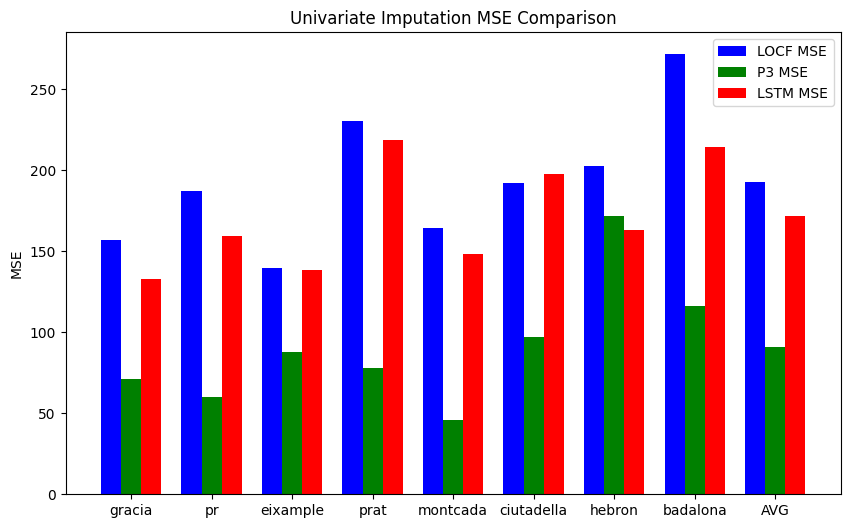

In [167]:
import matplotlib.pyplot as plt

# Prepare data for plotting
columns = list(locf_mse.keys())
locf_values = [locf_mse[col] for col in columns]
p3_values = [p3_mse[col] for col in columns]
lstm_values = [lstm_mse[col] for col in columns]

# Set position of bar on X axis
r1 = np.arange(len(columns))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, locf_values, color='b', width=0.25, label='LOCF MSE')
plt.bar(r2, p3_values, color='g', width=0.25, label='P3 MSE')
plt.bar(r3, lstm_values, color='r', width=0.25, label='LSTM MSE')

# Add xticks on the middle of the group bars
plt.xticks([r + 0.25 for r in range(len(columns))], columns)
plt.ylabel('MSE')
plt.title('Univariate Imputation MSE Comparison')

# Create legend & Show graphic
plt.legend()
plt.show()

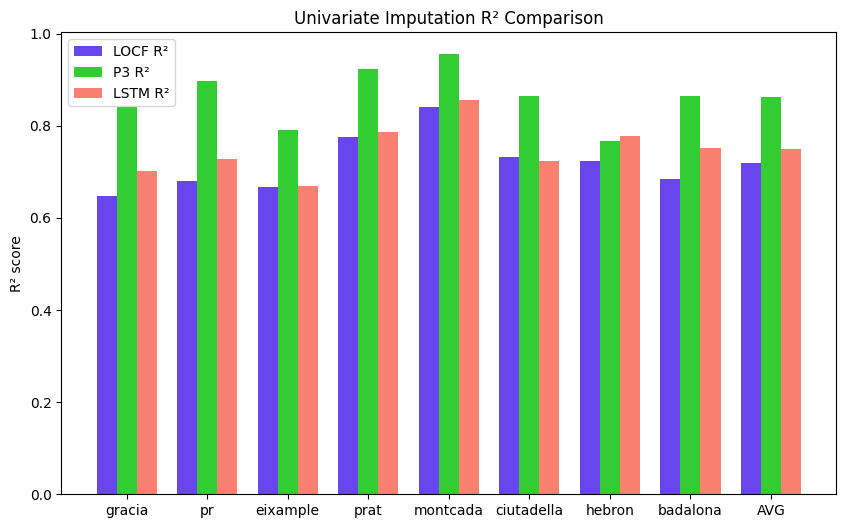

In [169]:
import matplotlib.pyplot as plt

# Prepare data for plotting
columns = list(locf_mse.keys())
locf_values = [locf_r2[col] for col in columns]
p3_values = [p3_r2[col] for col in columns]
lstm_values = [lstm_r2[col] for col in columns]

# Set position of bar on X axis
r1 = np.arange(len(columns))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, locf_values, color='#6945ED', width=0.25, label='LOCF R²')
plt.bar(r2, p3_values, color='#32CD32', width=0.25, label='P3 R²')
plt.bar(r3, lstm_values, color='#FA8072', width=0.25, label='LSTM R²')

# Add xticks on the middle of the group bars
plt.xticks([r + 0.25 for r in range(len(columns))], columns)
plt.ylabel('R² score')
plt.title('Univariate Imputation R² Comparison')

# Create legend & Show graphic
plt.legend()
plt.show()

# Multivariate models

## The MICE model
First use simple MLR with grid search params

In [312]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

mice  = IterativeImputer(estimator=LinearRegression(),
                         random_state=0, max_iter=200, tol=1e-7)

mice_mlr = pd.DataFrame(mice.fit_transform(missing), columns=missing.columns)

mice_mlr_mse, mice_mlr_r2 = compute_err_metrics(data, mice_mlr, miss_dict)

for column in mice_mlr_mse.keys():
    mse = mice_mlr_mse[column]
    r2 = mice_mlr_r2[column]
    print(f"MSE: {mse:.3f}, R²: {r2:.3f} <- {column}")

MSE: 63.444, R²: 0.874 <- gracia
MSE: 125.503, R²: 0.788 <- pr
MSE: 88.187, R²: 0.795 <- eixample
MSE: 198.674, R²: 0.812 <- prat
MSE: 116.714, R²: 0.878 <- montcada
MSE: 217.786, R²: 0.695 <- ciutadella
MSE: 119.407, R²: 0.847 <- hebron
MSE: 160.250, R²: 0.837 <- badalona
MSE: 136.246, R²: 0.816 <- AVG


Now we use KNN.

In [154]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 18 # Found using grid search
mice.estimator = KNeighborsRegressor(n_neighbors=n_neighbors)

mice_knn = pd.DataFrame(mice.fit_transform(missing), columns=missing.columns)

mice_knn_mse, mice_knn_r2 = compute_err_metrics(data, mice_knn, miss_dict)

for column in mice_knn_mse.keys():
    mse = mice_knn_mse[column]
    r2 = mice_knn_r2[column]
    print(f"MSE: {mse:.3f}, R²: {r2:.3f} <- {column}")

MSE: 70.099, R²: 0.843 <- gracia
MSE: 98.820, R²: 0.831 <- pr
MSE: 84.304, R²: 0.799 <- eixample
MSE: 179.835, R²: 0.824 <- prat
MSE: 103.673, R²: 0.899 <- montcada
MSE: 165.142, R²: 0.769 <- ciutadella
MSE: 117.503, R²: 0.840 <- hebron
MSE: 130.363, R²: 0.849 <- badalona
MSE: 118.717, R²: 0.832 <- AVG


c:\Users\adria\anaconda3\envs\ultralytics\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Auto Encoder

In [338]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Define the AE Architecture
class Autoencoder(nn.Module):
    def __init__(self, num_sensors):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_sensors, 4),  # Adjust the size as needed
            nn.ReLU(True),
            nn.Linear(4, 3)  # Latent space dimension
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 4),
            nn.ReLU(True),
            nn.Linear(4, num_sensors),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Step 2: Prepare the Data
num_sensors = meandf.shape[1]
data_tensor = torch.tensor(data.copy(deep=True).values, dtype=torch.float32)
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the AE
autoencoder = Autoencoder(num_sensors)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-4)

# Step 3: Train the AE
num_epochs = 200  # Adjust as needed
for epoch in range(num_epochs):
    for d in dataloader:
        inputs, = d
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    if epoch % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# After training, use autoencoder for reconstruction and substitution as needed

Epoch [1/200], Loss: 2520.5723
Epoch [3/200], Loss: 2886.7952
Epoch [5/200], Loss: 3245.8335
Epoch [7/200], Loss: 2590.8726
Epoch [9/200], Loss: 1305.5862
Epoch [11/200], Loss: 1358.3962
Epoch [13/200], Loss: 1548.5702
Epoch [15/200], Loss: 928.4561
Epoch [17/200], Loss: 590.7355
Epoch [19/200], Loss: 596.9061
Epoch [21/200], Loss: 355.9140
Epoch [23/200], Loss: 230.0839
Epoch [25/200], Loss: 276.2379
Epoch [27/200], Loss: 273.7605
Epoch [29/200], Loss: 177.5989
Epoch [31/200], Loss: 257.7602
Epoch [33/200], Loss: 151.6990
Epoch [35/200], Loss: 106.4066
Epoch [37/200], Loss: 235.1361
Epoch [39/200], Loss: 180.5105
Epoch [41/200], Loss: 129.1661
Epoch [43/200], Loss: 114.7726
Epoch [45/200], Loss: 131.2361
Epoch [47/200], Loss: 130.0856
Epoch [49/200], Loss: 117.5897
Epoch [51/200], Loss: 148.0051
Epoch [53/200], Loss: 179.7467
Epoch [55/200], Loss: 147.0585
Epoch [57/200], Loss: 140.2196
Epoch [59/200], Loss: 147.0509
Epoch [61/200], Loss: 152.6401
Epoch [63/200], Loss: 124.3911
Epoch 

In [343]:
mvi_tensor = torch.tensor(meandf.values, dtype=torch.float32)
autoencoder.eval()
for iter in range(0, 1000):
    with torch.no_grad():
        reconstructed = autoencoder(mvi_tensor)
    sum_abs_diff = 0.0
    for col in range(0, 8):
        for i in miss_dict[columns[col]]:
            sum_abs_diff += abs(mvi_tensor[i, col] - reconstructed[i, col])
            mvi_tensor[i, col] = reconstructed[i, col]
    if sum_abs_diff < 1e-3:
        print(f'Converged after {iter+1} iterations.')
        break

ae_df = pd.DataFrame(mvi_tensor,index=missing.index, columns=missing.columns)
ae_mse, ae_r2 = compute_err_metrics(data, ae_df, miss_dict)

for column in ae_mse.keys():
    mse = ae_mse[column]
    r2 = ae_r2[column]
    print(f"MSE: {mse:.3f}, R²: {r2:.3f} <- {column}")

In [342]:
class Autoencoder(nn.Module):
    def __init__(self, num_sensors):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_sensors, 128),  # Increased complexity
            nn.ReLU(True),
            nn.Linear(128, 64),  # Increased complexity
            nn.ReLU(True),
            nn.Linear(64, 32)  # Increased latent space dimension
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, num_sensors),
            nn.Sigmoid()  # Added for normalization of output
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Adjustments in training parameters
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)  # Adjusted learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)  # Learning rate scheduler

num_epochs = 300  # Increased number of epochs
for epoch in range(num_epochs):
    for d in dataloader:
        inputs, = d
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    scheduler.step()  # Adjust learning rate
    if epoch % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/300], Loss: 97.4647
Epoch [3/300], Loss: 86.2214
Epoch [5/300], Loss: 95.5430
Epoch [7/300], Loss: 85.9523
Epoch [9/300], Loss: 50.2313
Epoch [11/300], Loss: 76.9115
Epoch [13/300], Loss: 121.8775
Epoch [15/300], Loss: 93.4661
Epoch [17/300], Loss: 77.0742
Epoch [19/300], Loss: 88.5986
Epoch [21/300], Loss: 97.3084
Epoch [23/300], Loss: 93.3142
Epoch [25/300], Loss: 99.4122
Epoch [27/300], Loss: 63.9952
Epoch [29/300], Loss: 102.0674
Epoch [31/300], Loss: 90.2005
Epoch [33/300], Loss: 70.3294
Epoch [35/300], Loss: 84.5532
Epoch [37/300], Loss: 73.7066
Epoch [39/300], Loss: 54.6453
Epoch [41/300], Loss: 86.7120
Epoch [43/300], Loss: 99.2546
Epoch [45/300], Loss: 46.3261
Epoch [47/300], Loss: 68.4201
Epoch [49/300], Loss: 73.7762
Epoch [51/300], Loss: 66.1664
Epoch [53/300], Loss: 47.9712
Epoch [55/300], Loss: 62.2141
Epoch [57/300], Loss: 54.5973
Epoch [59/300], Loss: 52.7938
Epoch [61/300], Loss: 55.3135
Epoch [63/300], Loss: 98.4346
Epoch [65/300], Loss: 45.4881
Epoch [67/300

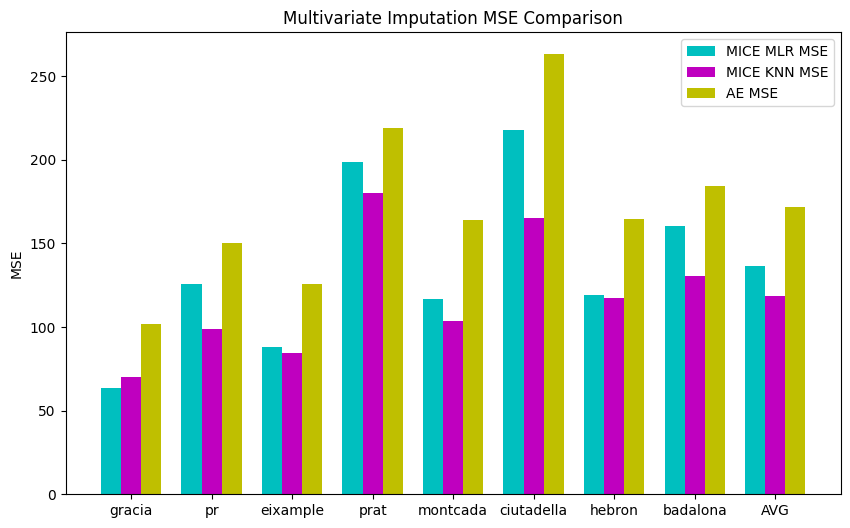

In [340]:
import matplotlib.pyplot as plt

# Prepare data for plotting
columns = list(locf_mse.keys())
locf_values = [locf_mse[col] for col in columns]
p3_values = [p3_mse[col] for col in columns]
lstm_values = [lstm_mse[col] for col in columns]

# Set position of bar on X axis
r1 = np.arange(len(columns))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, [mice_mlr_mse[col] for col in columns], color='c', width=0.25, label='MICE MLR MSE')
plt.bar(r2, [mice_knn_mse[col] for col in columns], color='m', width=0.25, label='MICE KNN MSE')
plt.bar(r3, [ae_mse[col] for col in columns], color='y', width=0.25, label='AE MSE')

# Add xticks on the middle of the group bars
plt.xticks([r + 0.25 for r in range(len(columns))], columns)
plt.ylabel('MSE')
plt.title('Multivariate Imputation MSE Comparison')

# Create legend & Show graphic
plt.legend()
plt.show()

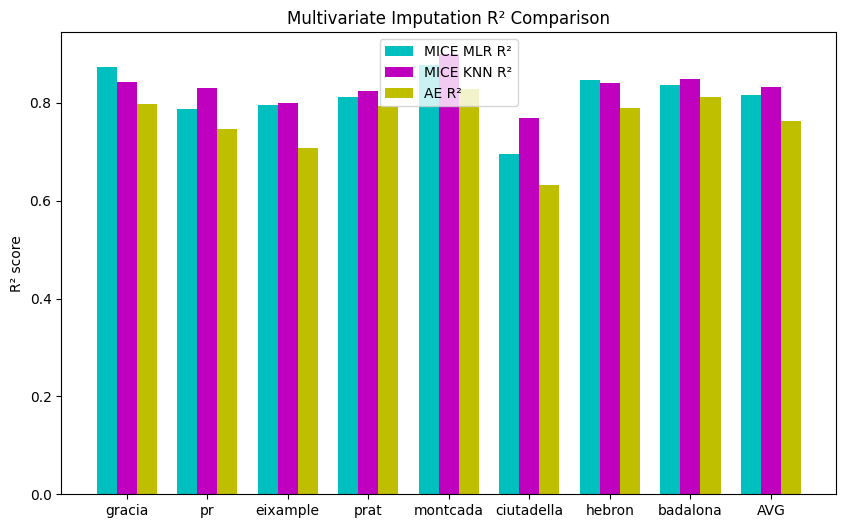

In [341]:
import matplotlib.pyplot as plt

r1 = np.arange(len(columns))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]
# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, [mice_mlr_r2[col] for col in columns], color='c', width=0.25, label='MICE MLR R²')
plt.bar(r2, [mice_knn_r2[col] for col in columns], color='m', width=0.25, label='MICE KNN R²')
plt.bar(r3, [ae_r2[col] for col in columns], color='y', width=0.25, label='AE R²')

# Add xticks on the middle of the group bars
plt.xticks([r + 0.25 for r in range(len(columns))], columns)
plt.ylabel('R² score')
plt.title('Multivariate Imputation R² Comparison')

# Create legend & Show graphic
plt.legend()
plt.show()